I referenced the Bert Carremans Kernel. He is a top ranker so that I could get lots of insights from his kernel. His Kernel is https://www.kaggle.com/bertcarremans/data-preparation-exploration

## Introduction

### Competition Description
Nothing ruins the thrill of buying a brand new car more quickly than seeing your new insurance bill. The sting's even more painful when you know you're a good driver. It doesn't seem fair that you have to pay so much if you've been cautions on the road for years. 

Porto Seguro, one of Brazil's largest auto and homeowner insurance companies, completely agrees. Inaccuracies in car insuarance company's claim predictions raise the cost of insurance for good drivers and reduce the price for bad ones.

In this competition, you're challenged to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year. While Porto Seguro has used machine learning for the past 20 years, they're looking to Kaggle's machine learning community to explore new, more powerful methods. A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers.

### Evaluation
Predictions are only used for ordering observations' therefore, the relative magnitude of the predictions are note used during scoring.  
The Gini Coefficient ranges from approximately 0 for random guessing, to approximately 0.5 for a perfect score. The theoretical maximum for the discrete calculation is **(1 - frac_pos) / 2**  

### Data Description

In this competition, you will predict the probability that an auto insurance policy holder files a claim.  
In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

## Loading Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

## Deduging

In [2]:
debug = False
if debug:
    NROWS = 50000
else:
    NROWS = None

## Loading Data

In [3]:
train = pd.read_csv('./data/train.csv', nrows=NROWS)
test = pd.read_csv('./data/test.csv', nrows=NROWS)

## Data at first sight

- Features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, clac).
- Feature names include the postfix bin to indicate binary features and cat to indicate categorical features
- Features without these designations are eighter continuous or ordinal
- Values of -1 indicate that the feature was missing from the observation.
- The target columns signifies wheter or not a claim was filed for that policy holer.

In [4]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


We indeed see the following:
- binary variables
- categorical variables of which the category values are integers
- other variables with integer or float values
- variables with -1 representing missing values
- the target variable and an ID variable

Let's take a look at the number of rows and columns in the train data set.

In [5]:
train.shape

(595212, 59)

We have 59 variables, we can't understand the meaning of variables from their names

In [6]:
train.drop_duplicates()
train.shape

(595212, 59)

There are no duplicate rows, so that's fine.

In [7]:
test.shape

(892816, 58)

One missing is the target variable. The point is rows of test are more than rows of train.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

Later on we can create dummy variables for the 14 categorical variables. The ***bin*** variables are already binary and don't need dummification.

With the info() method, we see that the data type is integer or float. No null values are present in the data set. It is natural because missing values are replaced by -1. We'll look into that later.

## Meta-data

To facilitate the data management, we'll store meta-information about the variables in a DataFrame. This will be helpful when we want to select specific variables for analysis, visualization, modeling, and so on.

Concretely, we will store:
- role: input, ID, target
- level: nominal, interval, ordinal, binary
- keep: True or False (whether we use it or not)
- dtype: int, float, str

In [9]:
data = []
for f in train.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == 'float64':
        level = 'interval'
    elif train[f].dtype == 'int64':
        level = 'ordinal'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
    
    # Defining the data type 
    dtype = train[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [10]:
meta.head()

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64


Example to extract all nominal variables that are not dropped

In [11]:
meta.loc[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

Below the number of variables per role and level are displayed.

In [12]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


## Descriptive Statistics

We can also apply the describe method on the dataframe. However, it doesn't make much sense to calculate the mean, std, ... on categorical variables and the id variable. We'll explore the categorical variables visually later.

Thanks to our meta file we can easily select the variables on which we want to compute the descriptive statistics. To keep things clear, we'll do this per data type.

### Interval Variables

In [13]:
interval_vars = meta.loc[(meta.level == 'interval') & (meta.keep)].index
train[interval_vars].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


#### reg variables

- only ***ps_reg_03*** has missing values
- the range (min to max) differs betwwen the variables. We could apply scaling (e.g. StandardScaler), but it depends on the classifier we will want to use. If we use tree based classifiers, we don't need to apply scaling. But linear regression, we need it.

#### car variables

- ***ps_car_12 and ps_car_14*** have missing values
- Again, the range differs and we could apply scaling

#### calc variables

- no missing values
- this seems to be some kind of ratio as the maximum is 0.9
- all three _calc variables have very similar distributions

**Overall**, we can see that the range of the interval variables is rather small. Perhaps some transformation (e.g. log) is already applied in order to anonymize the data?

### Ordinal variables

In [14]:
ordinal_vars = meta.loc[(meta.level == 'ordinal') & (meta.keep)].index
train[ordinal_vars].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


- Only one missing variaable: ps_car_11
- We could apply scaling to deal with the different ranges

### Binary variables

In [15]:
binary_vars = meta[(meta.level == 'binary') & (meta.keep)].index
train[binary_vars].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- A priori in the train data is 3.645%, which is **strongly imbalanced**
- From the means we can conclude that for most variables the value is zero in most cases.

## Handling imbalanced classes
As we mentioned above the proportion of records with target=1 is far less than target=0. This can lead to a model that has great accuracy but does have any added value in practice. Two possible strategies to deal with this problem are:
- oversampling records with target=1
- undersmapling records with target=0
There are many more strategies of course and MachineLearningMastery.com give a nice overview. As we have a rather large training set, we can go for undersmapling.

In [16]:
desired_apriori=0.1

# Get the indices per target value
idx_0 = train.loc[train.target == 0].index
idx_1 = train.loc[train.target == 1].index

# Get original number of records per target value
num_0 = len(train.loc[idx_0])
num_1 = len(train.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*num_1)/(num_0*desired_apriori)
undersampled_num_0 = int(undersampling_rate*num_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_num_0))

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_num_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


## Data Quality Checks
### Checking missing values
Missings are represented as -1

In [17]:
vars_with_missing = []

for col in train.columns:
    num_missings = train[train[col] == -1][col].count()
    if num_missings > 0:
        vars_with_missing.append(col)
        missings_percent = num_missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(col, num_missings, missings_percent))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


- ps_car_03_cat and ps_car_05_cat have a large proportion of records with missing values. Remove these variables
- ***For the other categorical variables with missing values, we can leave the missing value -1 as such because the proportion of those categorical variables is very small***
- ps_reg_03 (continuous) has missing values for 18% of all records. Replace by the mean.
- ps_car_11 (continuous) has only on record with missing value. Replace by the mean.
- ps_car_14 (continuous) has missing values for 7% of all records. Replace by the mean.

In [18]:
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, axis=1, inplace=True)
meta.loc[(vars_to_drop), 'keep'] = False # Updating the meta

In [19]:
# Imputing with the mean or mode
mean_imputer = SimpleImputer(missing_values=-1, strategy='mean')
mode_imputer = SimpleImputer(missing_values=-1, strategy='most_frequent')
train['ps_reg_03'] = mean_imputer.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_11'] = mode_imputer.fit_transform(train[['ps_car_11']]).ravel()
train['ps_car_14'] = mean_imputer.fit_transform(train[['ps_car_14']]).ravel()

### Checking the cardianlity of the categorical variables
***Cardinality refers to the number of different values in a variables.*** As we will create dummy variables from the categoriacla variables later on, we need to check whether there are variables with many distinct values. We should handle these variables differently as they would result in many dummy variables.

In [20]:
nominal_vars = meta.loc[(meta.level == 'nominal') & (meta.keep)].index
for col in nominal_vars:
    num_dist_values = train[col].nunique()
    print('Variable {} has {} disticnt values'.format(col, num_dist_values))

Variable ps_ind_02_cat has 5 disticnt values
Variable ps_ind_04_cat has 3 disticnt values
Variable ps_ind_05_cat has 8 disticnt values
Variable ps_car_01_cat has 13 disticnt values
Variable ps_car_02_cat has 3 disticnt values
Variable ps_car_04_cat has 10 disticnt values
Variable ps_car_06_cat has 18 disticnt values
Variable ps_car_07_cat has 3 disticnt values
Variable ps_car_08_cat has 2 disticnt values
Variable ps_car_09_cat has 6 disticnt values
Variable ps_car_10_cat has 3 disticnt values
Variable ps_car_11_cat has 104 disticnt values


Only ps_car_11_cat has many distinct values, although it is stil reasonable.

In [21]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None,
                 tst_series=None,
                 target=None,
                 min_samples_leaf=1,
                 smoothing=1,
                 noise_level=0):
    """
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    
    # Compute target mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    
    # Apply average function to all target data
    prior = target.mean()
    
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    
    # Apply averages to trn ad tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    # pd.merge does not keep the index to restore it
    ft_trn_series.index = trn_series.index
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [22]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

In [23]:
train_encoded

0         0.095546
1         0.121051
2         0.095095
3         0.086569
4         0.106917
            ...   
216935    0.122992
216936    0.114547
216937    0.121629
216938    0.120078
216939    0.067126
Name: ps_car_11_cat_mean, Length: 216940, dtype: float64

In [24]:
test_encoded

0         0.084419
1         0.075328
2         0.098049
3         0.096312
4         0.106575
            ...   
892811    0.181649
892812    0.103065
892813    0.120377
892814    0.116115
892815    0.081760
Name: ps_car_11_cat_mean, Length: 892816, dtype: float64

In [25]:
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

In [26]:
train.ps_car_11_cat_te.nunique()

216940

## EDA

### Categorical variables
Let's look into the categorical variables and the proportion of custmoers with target = 1

<Figure size 432x288 with 0 Axes>

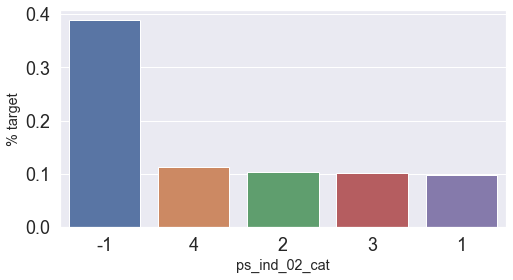

<Figure size 432x288 with 0 Axes>

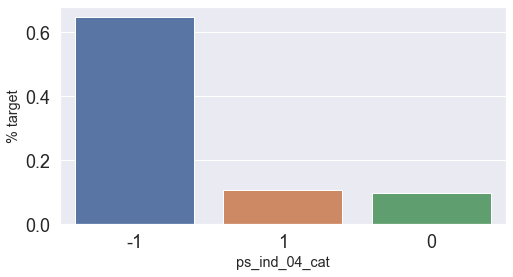

<Figure size 432x288 with 0 Axes>

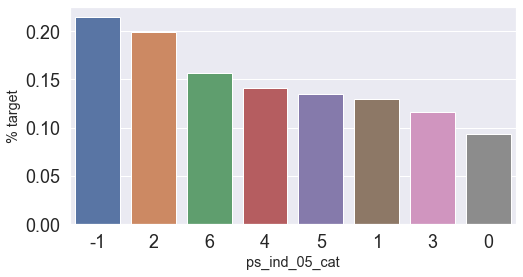

<Figure size 432x288 with 0 Axes>

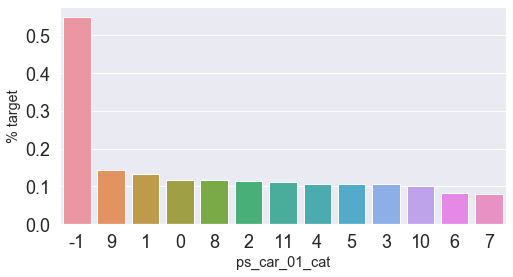

<Figure size 432x288 with 0 Axes>

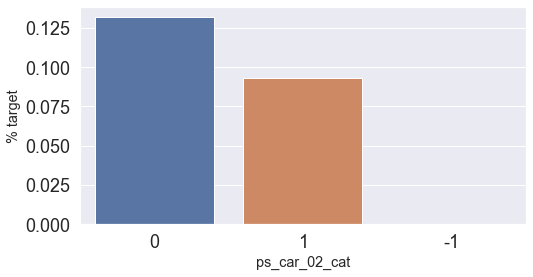

<Figure size 432x288 with 0 Axes>

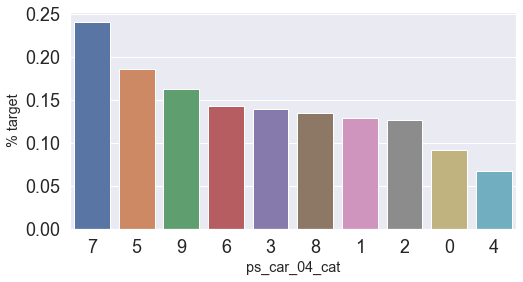

<Figure size 432x288 with 0 Axes>

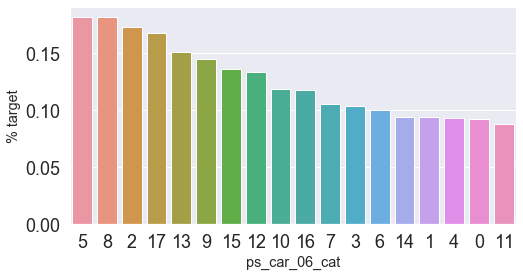

<Figure size 432x288 with 0 Axes>

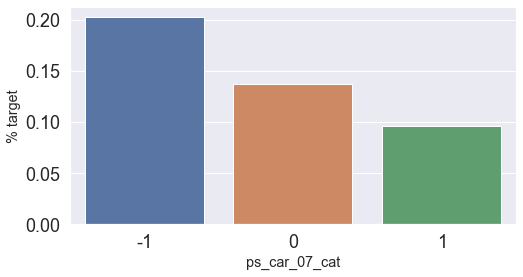

<Figure size 432x288 with 0 Axes>

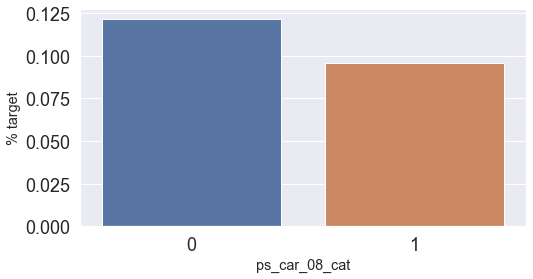

<Figure size 432x288 with 0 Axes>

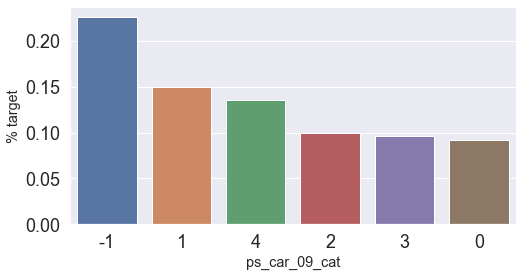

<Figure size 432x288 with 0 Axes>

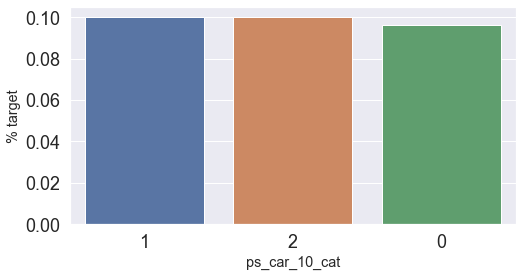

In [27]:
sns.set(font_scale=1.2)
nominal_vars = meta.loc[(meta.level == 'nominal') & (meta.keep)].index

for col in nominal_vars:
    plt.figure()
    fig, ax = plt.subplots(figsize=(8, 4))
    # Calculate the precentage of target=1 per category value
    cat_perc = train[[col, 'target']].groupby([col], as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(x=col, y='target', data=cat_perc, order=cat_perc[col], ax=ax)
    plt.ylabel('% target')
    plt.xlabel(col)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();    

As we can see from the variables **with missing values**, it is a good idea to keep the missing values as a separate category value, instead of replacing them by the mode for instance. The customers with a missing value appear to have a much higher (in some cases much lower) probability to ask for an insurance claim.

### Interval variables
Checking the correlations between interval variables. A heatmap is a good way to visualize the correlation between variables. The code below is based on [an example by Michael Waskom](http://seaborn.pydata.org/examples/many_pairwise_correlations.html)

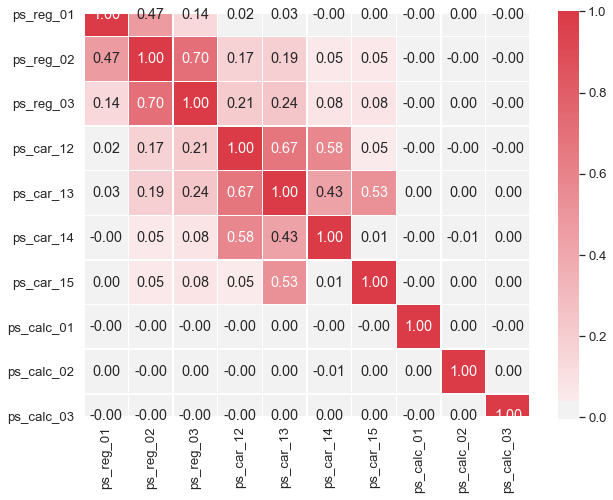

In [28]:
def corr_heatmap(interval_vars):
    correlations = train[interval_vars].corr()
    
    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1, center=0, fmt='.2f',
               square=True, linewidth=.5, annot=True,
               cbar_kws={'shrink': 0.75})
    plt.show();

interval_vars = meta.loc[(meta.level=='interval') & (meta.keep)].index
corr_heatmap(interval_vars)

There are a strong correlations between the variables:
- ps_reg_02 and ps_reg_03 (0.7)
- ps_car_12 and ps_car_13 (0.67)
- ps_car_12 and ps_car14 (0.58)
- ps_car_13 and ps_car15 (0.53)

Seaborn has some handy plots to visualize the (linear) relationship between variables. We could use a pairplot to visualize the relationship between the variables. But because the heatmap already showed the limited number of correlated variables, we'll look at each of the highly correlated variables separately.  
**NOTE**: I take a sample of the train data to speed up the process

In [29]:
train_sample = train.sample(frac=0.1)

#### ps_reg_02 and ps_reg_03 (0.7)

As the regression line shows, there is a linear relationship between these variables. Thanks to the *hue* parameter we can see that the regression lines for target=0 and target=1 are the same.

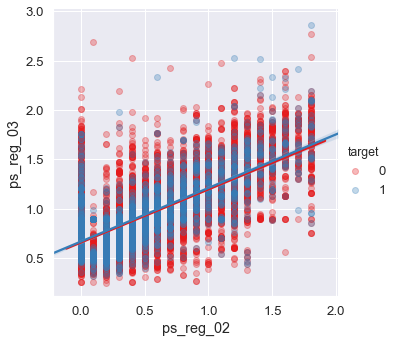

In [30]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=train_sample, hue='target',
          palette='Set1', scatter_kws={'alpha': 0.3})
plt.show()

#### ps_car_12 and ps_car_13 (0.67)

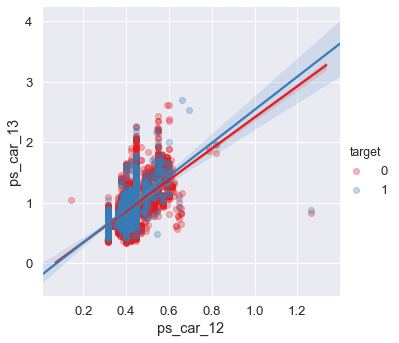

In [31]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=train_sample, hue='target',
          palette='Set1', scatter_kws={'alpha': 0.3})
plt.show()

#### ps_car_12 and ps_acr_14 (0.58)

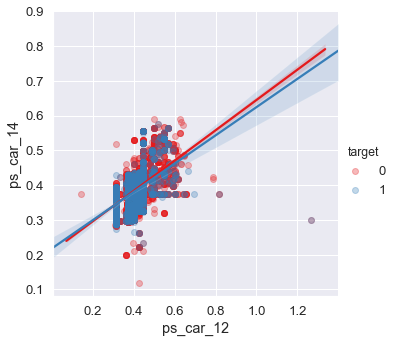

In [32]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=train_sample, hue='target',
          palette='Set1', scatter_kws={'alpha': 0.3})
plt.show()

#### ps_car_13 and ps_car_15 (0.53)

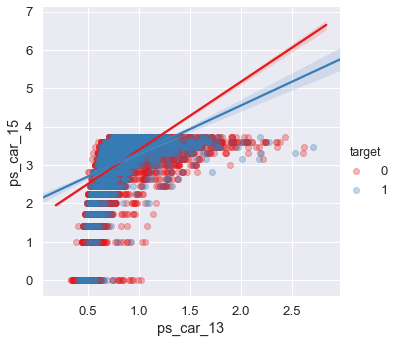

In [33]:
sns.lmplot(x='ps_car_13', y='ps_car_15', data=train_sample, hue='target',
          palette='Set1', scatter_kws={'alpha': 0.3})
plt.show()

How an we decide which of the correlated variables to keep? We could perform Principal Component Analysis (PCA) on the variables to reduce the dimensions. IN the AllSatate Claims Severity Competition I made [this kernel](https://www.kaggle.com/bertcarremans/reducing-number-of-numerical-features-with-pca) to do that. Bu as the number of correlated variables is rather low, we will let the model do the heavy-lifting

### Checking the correlations between ordinal variables

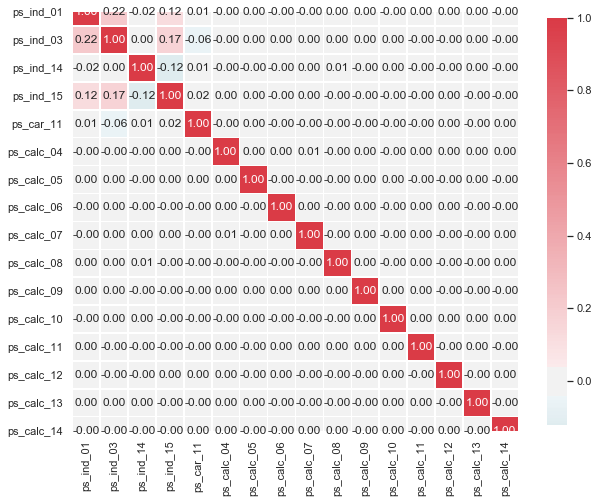

In [34]:
sns.set(font_scale=1)
oridnal_vars = meta.loc[(meta.level=='ordinal') & (meta.keep)].index
corr_heatmap(ordinal_vars)

For ordinal variables we do not see many correlations. We could, on the other hand, look at how the distributions are when grouping by the target value.

## Feature engineering
### Creating dummy variables
The values of the categorical variables do not represent any order or magnitude. For instance, category 2 is not twice the value of category 1. Therefore we can create dummy variables to deal with that. WE drop the first dummy variables as this information can be derived from the other dummy variables generated for the categories of the original variable.

In [35]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_te
0,353762,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,11,0,1,0,0.6,0.6,0.838153,11,1,0,6,1,1,2,1,1,0.368782,0.540603,0.345688,2.000000,0.9,0.3,0.0,3,0,7,3,8,4,8,1,0,4,6,0,1,1,0,0,1,0.095546
1,845629,0,5,1,7,1,1,1,0,0,0,0,0,0,0,0,5,0,0,1,0.9,0.6,0.728440,7,1,0,14,1,1,2,1,1,0.424264,0.382953,0.378814,0.000000,0.2,0.0,0.6,1,1,7,5,10,4,11,3,0,3,7,0,0,0,0,1,0,0.121051
2,1449185,0,4,1,3,1,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.9,0.6,0.869267,11,1,0,3,1,1,2,1,3,0.400000,0.814271,0.402368,3.316625,0.3,0.9,0.1,4,1,8,5,10,2,8,7,2,3,10,0,1,0,1,0,1,0.095095
3,834066,0,6,1,6,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.6,1.5,1.705872,6,1,0,1,1,1,0,1,2,0.400000,0.838387,0.378418,3.605551,0.8,0.4,0.1,3,3,7,2,11,3,10,2,2,0,14,0,0,0,0,0,0,0.086569
4,436189,0,5,1,5,0,0,0,0,1,0,0,0,0,0,0,10,1,0,0,0.8,0.8,1.086566,5,1,0,0,0,1,0,1,3,0.400000,0.905777,0.384838,3.605551,0.6,0.5,0.9,3,3,5,2,9,1,6,5,1,6,8,0,1,1,1,0,1,0.106917


In [36]:
print('Before dummification we have {} variables in train.'.format(train.shape[1]))
train = pd.get_dummies(train, columns=nominal_vars, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train.
After dummification we have 109 variables in train


So. creating dummy variables adds 52 variables to the training set.

In [37]:
train.head()

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_te,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,...,ps_car_01_cat_0,ps_car_01_cat_1,ps_car_01_cat_2,ps_car_01_cat_3,ps_car_01_cat_4,ps_car_01_cat_5,ps_car_01_cat_6,ps_car_01_cat_7,ps_car_01_cat_8,ps_car_01_cat_9,ps_car_01_cat_10,ps_car_01_cat_11,ps_car_02_cat_0,ps_car_02_cat_1,ps_car_04_cat_1,ps_car_04_cat_2,ps_car_04_cat_3,ps_car_04_cat_4,ps_car_04_cat_5,ps_car_04_cat_6,ps_car_04_cat_7,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_06_cat_1,ps_car_06_cat_2,ps_car_06_cat_3,ps_car_06_cat_4,ps_car_06_cat_5,ps_car_06_cat_6,ps_car_06_cat_7,ps_car_06_cat_8,ps_car_06_cat_9,ps_car_06_cat_10,ps_car_06_cat_11,ps_car_06_cat_12,ps_car_06_cat_13,ps_car_06_cat_14,ps_car_06_cat_15,ps_car_06_cat_16,ps_car_06_cat_17,ps_car_07_cat_0,ps_car_07_cat_1,ps_car_08_cat_1,ps_car_09_cat_0,ps_car_09_cat_1,ps_car_09_cat_2,ps_car_09_cat_3,ps_car_09_cat_4,ps_car_10_cat_1,ps_car_10_cat_2
0,353762,0,1,1,1,0,0,0,0,0,0,0,0,11,0,1,0,0.6,0.6,0.838153,1,0.368782,0.540603,0.345688,2.000000,0.9,0.3,0.0,3,0,7,3,8,4,8,1,0,4,6,0,1,1,0,0,1,0.095546,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0
1,845629,0,5,7,1,0,0,0,0,0,0,0,0,5,0,0,1,0.9,0.6,0.728440,1,0.424264,0.382953,0.378814,0.000000,0.2,0.0,0.6,1,1,7,5,10,4,11,3,0,3,7,0,0,0,0,1,0,0.121051,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0
2,1449185,0,4,3,1,0,0,0,0,0,0,0,0,4,1,0,0,0.9,0.6,0.869267,3,0.400000,0.814271,0.402368,3.316625,0.3,0.9,0.1,4,1,8,5,10,2,8,7,2,3,10,0,1,0,1,0,1,0.095095,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0
3,834066,0,6,6,1,0,0,0,0,0,0,0,0,8,1,0,0,0.6,1.5,1.705872,2,0.400000,0.838387,0.378418,3.605551,0.8,0.4,0.1,3,3,7,2,11,3,10,2,2,0,14,0,0,0,0,0,0,0.086569,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0
4,436189,0,5,5,0,0,1,0,0,0,0,0,0,10,1,0,0,0.8,0.8,1.086566,3,0.400000,0.905777,0.384838,3.605551,0.6,0.5,0.9,3,3,5,2,9,1,6,5,1,6,8,0,1,1,1,0,1,0.106917,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0


### Creating interaction variables

In [38]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[interval_vars]),
                           columns=poly.get_feature_names(interval_vars))
interactions.drop(interval_vars, axis=1, inplace=True) # Remove the original columns
# Concat the interaction variables to the train data
print('Before creating intercations we have {} variables in train.'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating intercations we have {} variables in train.'.format(train.shape[1]))

Before creating intercations we have 109 variables in train.
After creating intercations we have 164 variables in train.


This adds extra interaction variables to the train data. Thanks to the *get_feature_names* method we can assign column names to these new varaibles.

## Feature selection

### Removing features with low or zero variance

Personally, I prefer to let the classifier algorithm chose which features to keep. But there is one thing that we can do ourselves. That is removing features with no or a very low variance. Sklearn has a handy method to do that: **VarianceThreshold**. By default it removes features with zero variance. This will not be applicable for this competition as we saw there are no zero-variance variables in the previous steps. But if we would remove features with less than 1% variance, we would remove 31 variables.

In [39]:
selector = VarianceThreshold(threshold=0.01)
selector.fit(train.drop(['id', 'target'],axis=1)) # Fit to train without id and target variables

VarianceThreshold(threshold=0.01)

In [40]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False,  True,  True,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [41]:
vfunc = np.vectorize(lambda x: not x) # Function to toggle boolean array elements
not_selected_columns = train.drop(['id', 'target'], axis=1).columns[vfunc(selector.get_support())]
print('{} variables have too low variance'.format(len(not_selected_columns)))
print('These variables are {}'.format(list(not_selected_columns)))

28 variables have too low variance
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


We would lose rather many variabels if we would select based on variance. But because we do not have so many variables , we'll let the classifier chose. For data sets with many more variables this could reduce the processing time.

Sklearn also comes with other [feature selection methods.](https://scikit-learn.org/stable/modules/feature_selection.html) One of these methods is *SelectFromModel* in which you let another classifier select the best features and continue with these. Below I'll show you how to do that with a Random Forest

### Selecting features with a Random Forest and SelectFromModel

Here we'll base feature selection on the feature importances of a random forest. With Sklearn's SelectFromMoel you can then specify how many variables you want to keep. You can set a threshold on the level of feature importnace manually. But we'll simply select the top 50% best variables.

The code in the cell below is borrowed from the [GitHub repo of Sebastian Raschka](https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch04/ch04.ipynb). This repo contains code samples of his book *Python Machine Learning*, which is an absolute must to read.

In [44]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

In [50]:
np.argsort(rf.feature_importances_)

array([ 74, 106,   6,  77,  87,  75,  81,  73,   9,  76,   7,  84,  55,
        58,  92,  91,  79,  95,  96,  59,  78, 104,   8,  53, 105,  82,
        51,  88,  94,  10, 103,  57,  60,  72,  86,  71,  89,  52,  85,
        62,  47,  54,  83,  69,  70,  65,  99,  97,  46,  56,  61,  63,
        93,  66,  67,  14,   5,  90, 101,  98,   4,  80,  37,   2,  45,
        42, 100,  64,  44, 102,   3,  68,  12,  49,  48,  40,  41,  38,
        39,  13,  50,  18,  15, 107,  16, 117,  19, 134, 159,  24,  23,
       156, 161,  25, 152,  22, 108,  34,  26,  27,   0,  31, 116, 115,
       114,  28, 124, 125, 123, 119, 110,  30,  29, 158, 157, 160, 113,
       122, 139, 140, 138,  35, 153, 155, 154, 137,  11, 118,  33, 147,
        21, 121, 136,   1,  36, 149,  32, 151, 150, 131, 132, 133,  17,
       126, 112, 120, 145, 146, 109, 144, 148, 130, 127, 129, 143, 111,
       128, 142, 141, 135,  20,  43], dtype=int64)

In [49]:
indices

array([ 43,  20, 135, 141, 142, 128, 111, 143, 129, 127, 130, 148, 144,
       109, 146, 145, 120, 112, 126,  17, 133, 132, 131, 150, 151,  32,
       149,  36,   1, 136, 121,  21, 147,  33, 118,  11, 137, 154, 155,
       153,  35, 138, 140, 139, 122, 113, 160, 157, 158,  29,  30, 110,
       119, 123, 125, 124,  28, 114, 115, 116,  31,   0,  27,  26,  34,
       108,  22, 152,  25, 161, 156,  23,  24, 159, 134,  19, 117,  16,
       107,  15,  18,  50,  13,  39,  38,  41,  40,  48,  49,  12,  68,
         3, 102,  44,  64, 100,  42,  45,   2,  37,  80,   4,  98, 101,
        90,   5,  14,  67,  66,  93,  63,  61,  56,  46,  97,  99,  65,
        70,  69,  83,  54,  47,  62,  85,  52,  89,  71,  86,  72,  60,
        57, 103,  10,  94,  88,  51,  82, 105,  53,   8, 104,  78,  59,
        96,  95,  79,  91,  92,  58,  55,  84,   7,  76,   9,  73,  81,
        75,  87,  77,   6, 106,  74], dtype=int64)

In [48]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) ps_car_11_cat_te               0.021153
 2) ps_car_13                      0.017339
 3) ps_car_12 ps_car_13            0.017329
 4) ps_car_13^2                    0.017306
 5) ps_car_13 ps_car_14            0.017168
 6) ps_reg_03 ps_car_13            0.017054
 7) ps_reg_01 ps_car_13            0.016815
 8) ps_car_13 ps_car_15            0.016748
 9) ps_reg_03 ps_car_14            0.016276
10) ps_reg_03 ps_car_12            0.015637
11) ps_reg_03 ps_car_15            0.015083
12) ps_car_14 ps_car_15            0.014974
13) ps_car_13 ps_calc_01           0.014755
14) ps_reg_01 ps_reg_03            0.014753
15) ps_car_13 ps_calc_03           0.014703
16) ps_car_13 ps_calc_02           0.014693
17) ps_reg_02 ps_car_13            0.014641
18) ps_reg_01 ps_car_14            0.014396
19) ps_reg_03^2                    0.014248
20) ps_reg_03                      0.014197
21) ps_reg_03 ps_calc_03           0.013809
22) ps_reg_03 ps_calc_02           0.013751
23) ps_reg_03 ps_calc_01        

With SelectFromMoel we can specify which prefit classifier to use and what the threshold is for the feature importances. With the *get_support* method we can then limit the number of variables in the train data.

In [53]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before a selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before a selection: 162
Number of features after selection: 81


In [54]:
train = train[selected_vars + ['target']]

## Feature Scaling

As mentioned before, we can apply standard scaling to the training data. Some classifiers perform better when this is done.

In [55]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])